In [ ]:
SEED=123

In [6]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [7]:
FILE_PATH="trainimage.npy"
LABELS_PATH="trainLabels.csv"

FILE_PATH_test="testimage.npy"
LABELS_PATH_test="testLabels.csv"

In [8]:
data = np.random.random(size=(100000,100))
data_df = pd.DataFrame(data)

In [9]:
# Load the image file of dataset
images = np.load(FILE_PATH)

# Load the labels file of dataset
#labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/plant_seedlings_numpy/')
labels = pd.read_csv(LABELS_PATH)


# Load the image file of dataset
images_test = np.load(FILE_PATH_test)

# Load the labels file of dataset
#labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/plant_seedlings_numpy/')
labels_test = pd.read_csv(LABELS_PATH_test)

In [10]:
print(images.shape)
print(labels.shape)


print(images_test.shape)
print(labels_test.shape)

(251, 128, 128, 3)
(251, 1)
(66, 128, 128, 3)
(66, 1)


In [11]:
labels['Label'].value_counts()

Covid              111
Normal              70
Viral Pneumonia     70
Name: Label, dtype: int64

In [12]:
labels['Label'].value_counts(normalize=True)

Covid              0.442231
Normal             0.278884
Viral Pneumonia    0.278884
Name: Label, dtype: float64

In [13]:
species = labels['Label'].unique()
len(species)

3

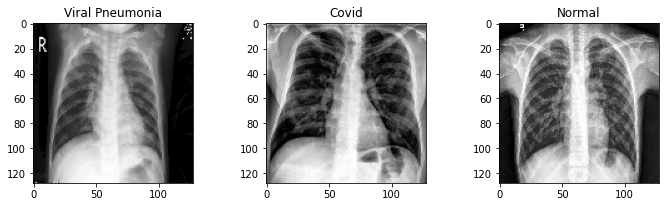

In [14]:
# Show some example images
plt.figure(figsize=(16,10))
for i, s in enumerate(species):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[labels[labels['Label']==s].head(10).index[1]])
    plt.title(s)

# Apply image processing on the images:



In [15]:
plt.figure(figsize=(16,10))

preprocessed_images = []       # Initialize empty list to store the images after pre-processing.

for img in images:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)
    preprocessed_images.append(blurImg)# Append image 
    
    # Show examples

<Figure size 1152x720 with 0 Axes>

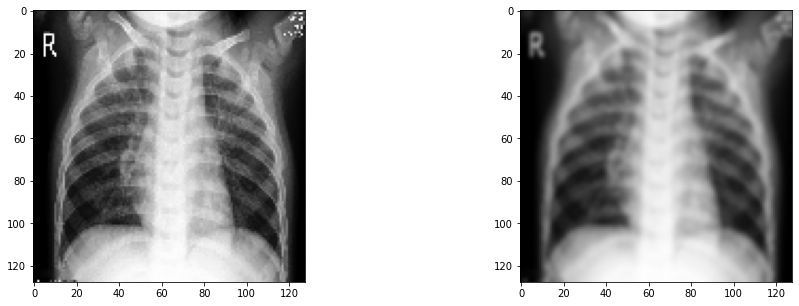

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1); plt.imshow(images[0])         # Show the original image
plt.subplot(1, 2, 2); plt.imshow(preprocessed_images[0])     # Blur image

In [17]:
preprocessed_images = np.asarray(preprocessed_images)    # Convert to numpy array.

In [18]:
len(preprocessed_images), len(images)

(251, 251)

In [19]:
preprocessed_images[0].shape, images[0].shape

((128, 128, 3), (128, 128, 3))

In [20]:
# Normalize image data.
preprocessed_images = preprocessed_images / 255

In [21]:
images = images / 255

# Make data compatible:




In [22]:
# Convert labels from digits to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(labels)

In [23]:
y[0]

array([0, 0, 1])

In [25]:
X_train = images
y_train = labels.to_numpy()

X_test = images_test
y_test = labels_test.to_numpy()

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(251, 128, 128, 3)
(251, 1)
(66, 128, 128, 3)
(66, 1)


In [27]:
# Reshape data into shapes compatible with Keras models.

X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)
#X_train_org = X_train.reshape(X_train_org.shape[0], 1)
#X_test_org = X_test.reshape(X_test_org.shape[0], 1)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#print(X_train_org.shape)
#print(X_test_org.shape)

(251, 128, 128, 3)
(251, 1)
(66, 128, 128, 3)
(66, 1)


So, we can see above that the data was already compatible with Keras, as the shape of data before and after reshaping is same.

# Building CNN:

- Define layers.
- Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy)

In [29]:
def architecture_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.GlobalMaxPooling2D())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(12, activation="softmax"))
    
    return model

def architecture_2():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.GlobalMaxPooling2D())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(12, activation="softmax"))

    
    return model

def architecture_3():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.GlobalMaxPooling2D())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(12, activation="softmax"))

    return model


def architecture_4():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.GlobalMaxPooling2D())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(12, activation="softmax"))

    return model



In [30]:
import tensorflow as tf

In [31]:
model = architecture_1()

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               8448      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                3

In [33]:
l = model.layers

In [34]:
l[0].trainable

True

In [35]:
l[0].name

'conv2d'

In [36]:
l[0].trainable = False

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               8448      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                3

### Model Architecture

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               8448      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                3

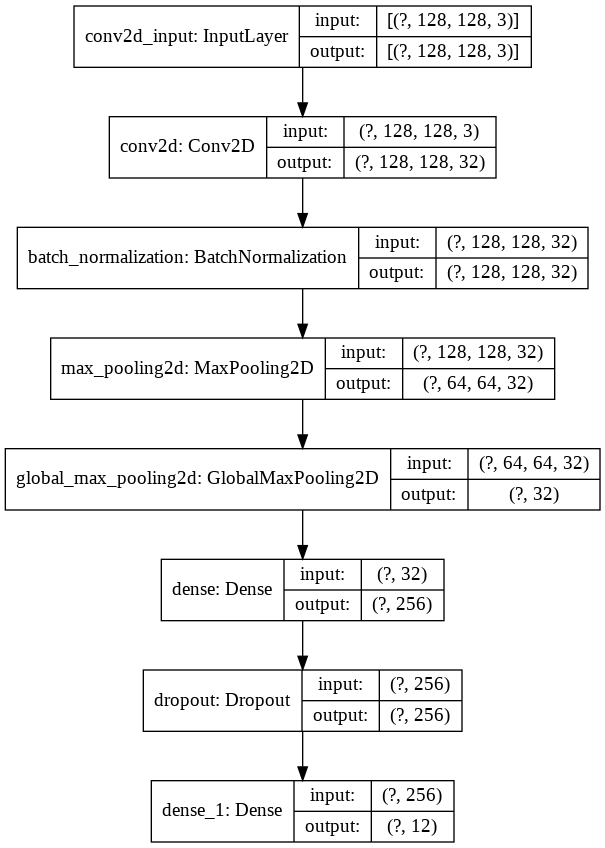

In [39]:
tf.keras.utils.plot_model(
    model, to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
)

In [40]:
# Set the optimizer and loss function, and compile the model with them.

optimizer = tf.keras.optimizers.Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-07,
                  amsgrad=False,
                  name='Adam')
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer = optimizer, loss=loss, metrics=["accuracy"])


In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_path = "./training3/cp-{epoch:04d}_loss{val_loss:.4f}.ckpt"

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint(checkpoint_path,
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=False,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)

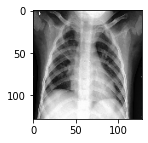

Predicted Label 0
True Label 0


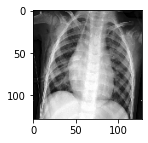

Predicted Label 0
True Label 0


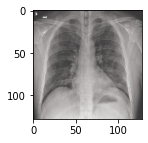

Predicted Label 0
True Label 0


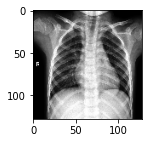

Predicted Label 0
True Label 0


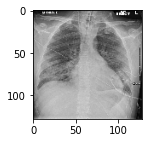

Predicted Label 0
True Label 0


In [48]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test[3],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[3].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[3]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[2],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[2].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[2]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[33],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[33].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[33]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[59].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[59]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[36],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[36].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[36]))

### Features learned at every step

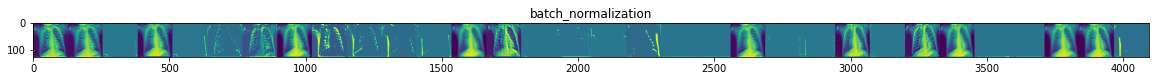

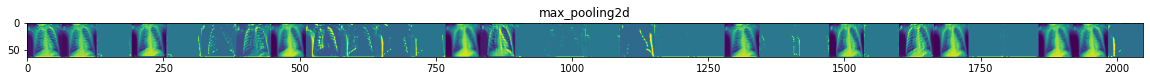

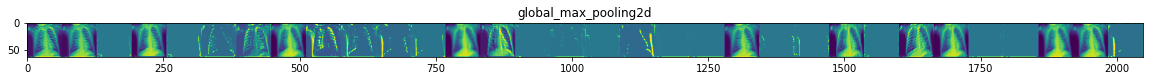

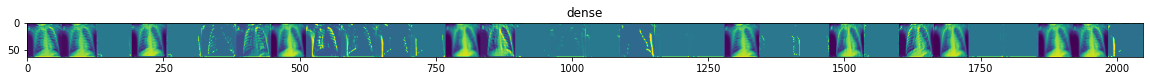

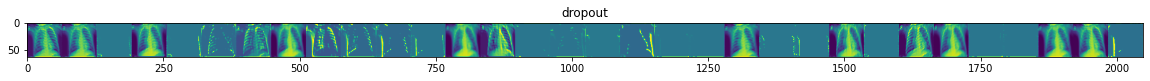

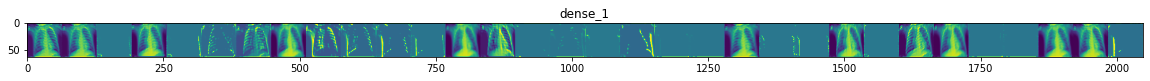

In [50]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


img = preprocessed_images[3]
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Rescale by 1/255
#x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
            # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')